# Lecture 5 - Cuts

##  Header

In [1]:
# # Dependencies: Uncomment and run this cell if you don't have these packages 
# using Pkg
# Pkg.add("JuMP")
# Pkg.add("Gurobi")
# Pkg.add("Combinatorics")
# Pkg.add("Plots")

In [2]:
include("../01-tsp/src/data.jl");
include("../01-tsp/src/opt.jl");
include("../01-tsp/src/out.jl");
include("src/tracking.jl");

## Setup

We are going to look at a Gurobi log for an instance of the MTZ formulation. Let us first generate instance data.

In [3]:
# One instance to deep-dive into each model
dat = TSPInstance(150, random_seed = 1)

TSP Instance with 150 cities

We'll use solvers with and without cuts to see how cuts impact the solver.

In [4]:
optimizer_cuts = JuMP.optimizer_with_attributes(Gurobi.Optimizer, "TimeLimit" => 15)
optimizer_nocuts = JuMP.optimizer_with_attributes(Gurobi.Optimizer, "Cuts" => 0, "TimeLimit" => 15)

MathOptInterface.OptimizerWithAttributes(Gurobi.Optimizer, Pair{MathOptInterface.AbstractOptimizerAttribute, Any}[MathOptInterface.RawOptimizerAttribute("Cuts") => 0, MathOptInterface.RawOptimizerAttribute("TimeLimit") => 15])

## The impact of cutting planes

First, we turn off cutting planes and solve.

Set parameter Username
Academic license - for non-commercial use only - expires 2025-01-18
Set parameter Cuts to value 0
Set parameter TimeLimit to value 15
Set parameter Cuts to value 0
Set parameter TimeLimit to value 15
Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[arm] - Darwin 23.3.0 23D56)

CPU model: Apple M1 Pro
Thread count: 10 physical cores, 10 logical processors, using up to 10 threads

Optimize a model with 45301 rows, 22650 columns and 156455 nonzeros
Model fingerprint: 0xde9bd251
Variable types: 150 continuous, 22500 integer (22500 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+02]
  Objective range  [5e-03, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+02]
Presolve removed 11774 rows and 151 columns
Presolve time: 0.20s
Presolved: 33527 rows, 22499 columns, 133206 nonzeros
Variable types: 149 continuous, 22350 integer (22350 binary)
Deterministic concurrent LP optimizer: primal and dual simplex
Showing primal log only...

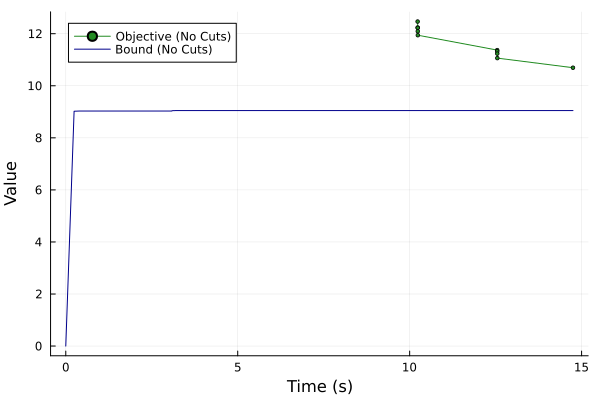

In [5]:
mdl_mtz = TSPModel(dat, optimizer = optimizer_nocuts)
add_mtz_constraints!(mdl_mtz)
add_tracking_callback!(mdl_mtz)
solve!(mdl_mtz)
plot_progress([mdl_mtz], ["No Cuts"])

Now, we turn cutting planes back on and solve. We can see that with cutting planes, the solver finds high-quality solutions faster, and makes more progress on the lower bound.

Set parameter Username
Academic license - for non-commercial use only - expires 2025-01-18
Set parameter TimeLimit to value 15
Set parameter TimeLimit to value 15
Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[arm] - Darwin 23.3.0 23D56)

CPU model: Apple M1 Pro
Thread count: 10 physical cores, 10 logical processors, using up to 10 threads

Optimize a model with 45301 rows, 22650 columns and 156455 nonzeros
Model fingerprint: 0xde9bd251
Variable types: 150 continuous, 22500 integer (22500 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+02]
  Objective range  [5e-03, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+02]
Presolve removed 11774 rows and 151 columns
Presolve time: 0.20s
Presolved: 33527 rows, 22499 columns, 133206 nonzeros
Variable types: 149 continuous, 22350 integer (22350 binary)
Deterministic concurrent LP optimizer: primal and dual simplex
Showing primal log only...

Concurrent spin time: 0.00s

Solved with dual simplex

Use

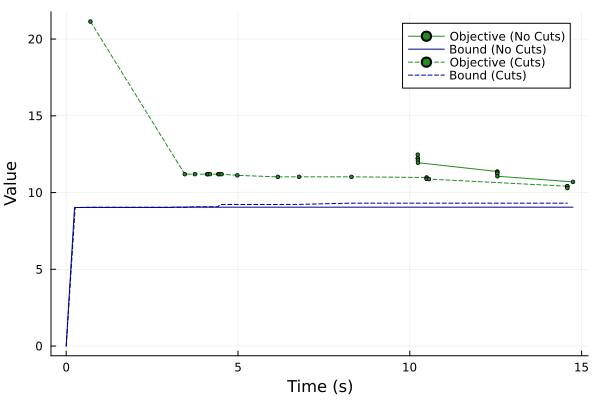

In [6]:
mdl_mtz_2 = TSPModel(dat, optimizer = optimizer_cuts)
add_mtz_constraints!(mdl_mtz_2)
add_tracking_callback!(mdl_mtz_2)
solve!(mdl_mtz_2)
plot_progress([mdl_mtz, mdl_mtz_2], ["No Cuts", "Cuts"])